In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from xgboost import XGBClassifier



<Axes: ylabel='count'>

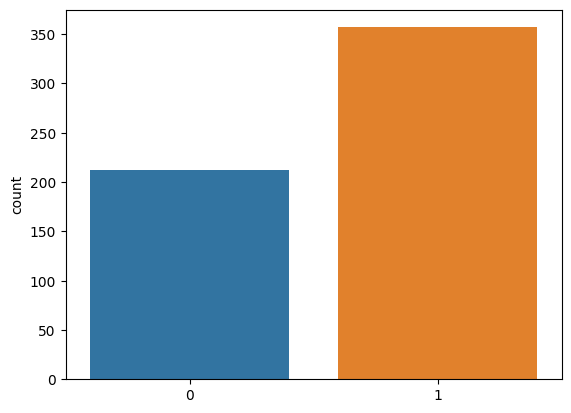

In [31]:
sns.countplot(x = y)

In [19]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the data into training and test sets
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Perform undersampling
undersampler = RandomUnderSampler(random_state=42)
X_dev_undersampled, y_dev_undersampled = undersampler.fit_resample(X_dev, y_dev)

# Perform oversampling
oversampler = RandomOverSampler(random_state=42)
X_dev_oversampled, y_dev_oversampled = oversampler.fit_resample(X_dev, y_dev)

# Perform SMOTE
smote = SMOTE(random_state=42)
X_dev_smote, y_dev_smote = smote.fit_resample(X_dev, y_dev)

# Train the decision tree classifier on the original data
decision_tree_original = DecisionTreeClassifier(random_state=42)
decision_tree_original.fit(X_dev, y_dev)

# Train the decision tree classifier on the undersampled data
decision_tree_undersampled = DecisionTreeClassifier(random_state=42)
decision_tree_undersampled.fit(X_dev_undersampled, y_dev_undersampled)

# Train the decision tree classifier on the oversampled data
decision_tree_oversampled = DecisionTreeClassifier(random_state=42)
decision_tree_oversampled.fit(X_dev_oversampled, y_dev_oversampled)

# Train the decision tree classifier on the SMOTE data
decision_tree_smote = DecisionTreeClassifier(random_state=42)
decision_tree_smote.fit(X_dev_smote, y_dev_smote)

# Make predictions on the test set
y_pred_original = decision_tree_original.predict(X_test)
y_pred_undersampled = decision_tree_undersampled.predict(X_test)
y_pred_oversampled = decision_tree_oversampled.predict(X_test)
y_pred_smote = decision_tree_smote.predict(X_test)


# Calculate and print accuracy scores
accuracy_original = accuracy_score(y_test, y_pred_original)
accuracy_undersampled = accuracy_score(y_test, y_pred_undersampled)
accuracy_oversampled = accuracy_score(y_test, y_pred_oversampled)
accuracy_smote = accuracy_score(y_test, y_pred_smote)

print("Accuracy - Original: {:.2f}%".format(accuracy_original * 100))
print("Accuracy - Undersampled: {:.2f}%".format(accuracy_undersampled * 100))
print("Accuracy - Oversampled: {:.2f}%".format(accuracy_oversampled * 100))
print("Accuracy - SMOTE: {:.2f}%".format(accuracy_smote * 100))


Accuracy - Original: 91.23%
Accuracy - Undersampled: 90.35%
Accuracy - Oversampled: 92.11%
Accuracy - SMOTE: 90.35%


In [28]:
DT_fpr, DT_tpr, thresholds = roc_curve(y_test, y_pred_original)
oversample_fpr, oversample_tpr, thresholds = roc_curve(y_test,y_pred_oversampled)
undersample_fpr, undersample_tpr, thresholds = roc_curve(y_test, y_pred_undersampled)
smote_fpr, smote_tpr, thresholds = roc_curve(y_test, y_pred_smote)

print("Decision Tree:", metrics.auc(DT_fpr, DT_tpr))
print("Over Sample:",metrics.auc(oversample_fpr, oversample_tpr))
print("Under Sample:",metrics.auc(undersample_fpr, undersample_tpr))
print("Smote:",metrics.auc(smote_fpr, smote_tpr))

Decision Tree: 0.9158463004128294
Over Sample: 0.9233089869799938
Under Sample: 0.9083836138456653
Smote: 0.9083836138456653


<Figure size 1200x1000 with 0 Axes>

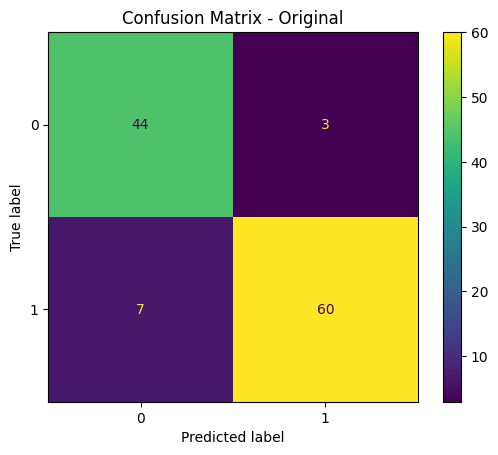

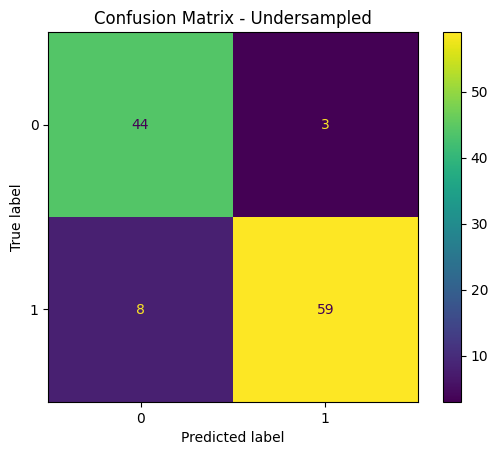

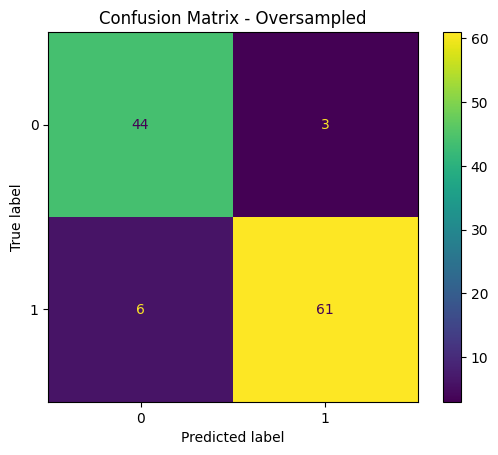

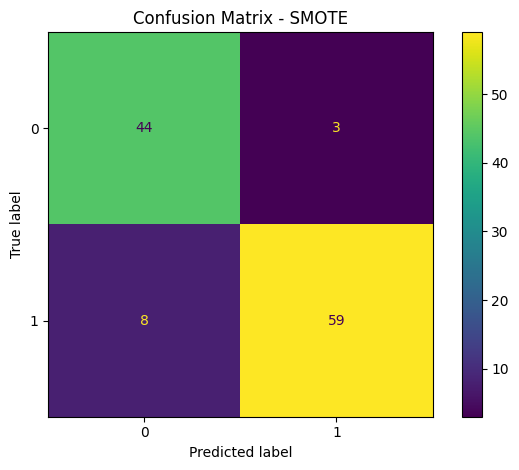

In [20]:
# Plot confusion matrices
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix,ConfusionMatrixDisplay
plt.figure(figsize=(12, 10))

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_original)).plot()
plt.title('Confusion Matrix - Original')


ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_undersampled)).plot()
plt.title('Confusion Matrix - Undersampled')


ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_oversampled)).plot()
plt.title('Confusion Matrix - Oversampled')


ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_smote)).plot()
plt.title('Confusion Matrix - SMOTE')

plt.tight_layout()
plt.show()


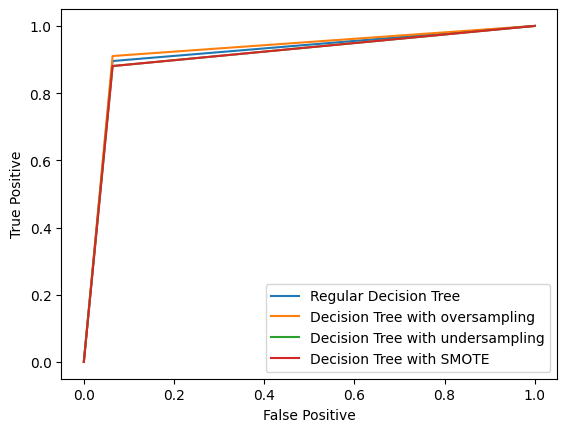

In [21]:
plt.xlabel('False Positive')
plt.ylabel('True Positive')

plt.plot(DT_fpr, DT_tpr, label='Regular Decision Tree')
plt.plot(oversample_fpr, oversample_tpr, label='Decision Tree with oversampling')
plt.plot(undersample_fpr, undersample_tpr, label='Decision Tree with undersampling')
plt.plot(smote_fpr, smote_tpr, label='Decision Tree with SMOTE')
plt.legend()


plt.show()

## class weight

In [22]:
Decision_tree = tree.DecisionTreeClassifier(max_depth=10, random_state=42,class_weight='balanced')
Decision_tree = Decision_tree.fit(X_dev, y_dev)

scores = cross_validate(Decision_tree, X_dev, y_dev, cv=5, scoring=['roc_auc', 'average_precision'])
scores['test_roc_auc'].mean(), scores['test_average_precision'].mean()

(0.9234587251828632, 0.9252701960765934)

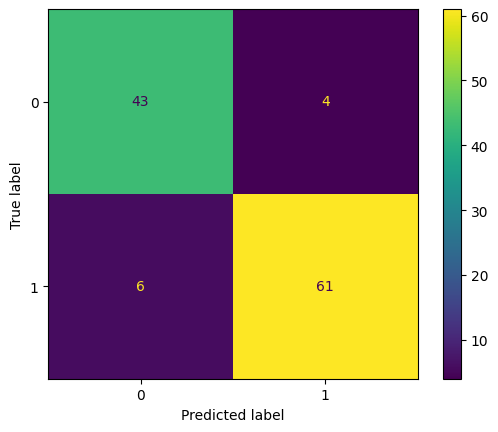

In [23]:

y_pred = Decision_tree.predict(X_test)
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

# Imbalance:

- Class weight: Use class_weight='balanced' in the classifier when the class imbalance is mild and does not significantly impact the model's performance.

- Undersampling: Consider undersampling the majority class when it has a large number of instances and the minority class is adequately represented. This method can be useful to reduce computational complexity and training time.

- Oversampling: Consider oversampling the minority class when it has limited data. This can help the model learn minority class patterns better. Use techniques like random oversampling or SMOTE to increase the number of minority class samples.

- SMOTE: Use SMOTE when the minority class is severely underrepresented. SMOTE creates synthetic samples to balance the class distribution and can improve the model's generalization. It addresses the overfitting issue associated with simple oversampling techniques.

